## The Objective Function



Text(0, 0.5, 'y')

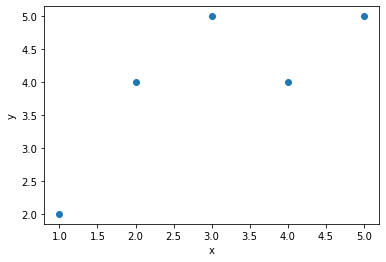

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion() # this is to turn on the interactivity

X = np.array([[1], [2], [3], [4], [5]])
Y = np.array([[2], [4], [5], [4], [5]])
# plot the data
plt.scatter(X, Y)
plt.xlabel("x")
plt.ylabel("y")

In [2]:
def model(X, theta):
    """
    This is the linear model.
    returns predictions y_hat for given X.
    """
    return theta[0]*X + theta[1]

def sum_squared_error(theta, X, Y):
    """
    Objective function -- sum of squared errors.
    """
    return np.sum((Y - model(X, theta))**2)

In [3]:
# test
theta_star = np.array([0.6, 2.2])
print(sum_squared_error(theta_star, X, Y))

2.3999999999999995


Text(0, 0.5, 'y')

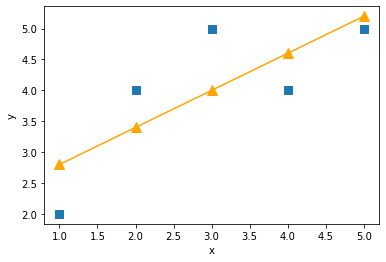

In [4]:
# plotting model predictions.
y_hat = model(X, theta_star)
plt.scatter(X, Y, marker="s", s=80)
plt.plot(X, y_hat, marker='^', color="orange", 
         markersize=10)
plt.xlabel("x")
plt.ylabel("y")

### Contour Plots

Drawing a contour plot to check how the objective fucntion changes with the decision vector $\theta$.

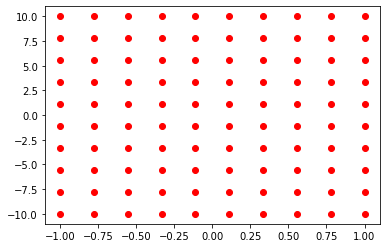

In [5]:
theta_1 = np.linspace(-1, 1, 10) # first dimension of theta
theta_2 = np.linspace(-10, 10, 10) # second dimension of theta
Xp, Yp = np.meshgrid(theta_1, theta_2) # create a grid of points.

plt.scatter(Xp, Yp, color="red")

In [6]:
# better grid, as the above is too coarse
theta_1 = np.linspace(-1, 1, 1000) # first dimension of theta
theta_2 = np.linspace(-10, 10, 1000) # second dimension of theta
Xp, Yp = np.meshgrid(theta_1, theta_2) # create a grid of points.
Z = np.zeros(Xp.shape)
for (i,j),v in np.ndenumerate(Xp):
    Z[i,j] = sum_squared_error(np.array([Xp[i,j], Yp[i,j]]), X, Y)

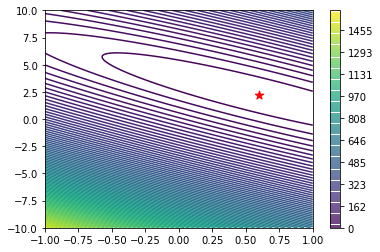

In [7]:
plt.contour(Xp, Yp, Z, np.linspace(0, 1600, 100))
plt.colorbar()
plt.scatter([0.6], [2.2], marker="*", s=80, color="red")

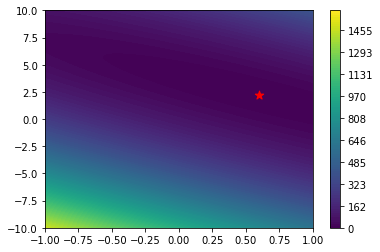

In [8]:
plt.contourf(Xp, Yp, Z, np.linspace(0, 1600, 100))
plt.colorbar()
plt.scatter([0.6], [2.2], marker="*", s=80, color="red")

## Grid Search

In [9]:
import itertools

def cartesian_product_recursive(*seqin):
    '''returns a list of all combinations of argument sequences.
    for example: combine((1,2),(3,4)) returns
    [[1, 3], [1, 4], [2, 3], [2, 4]]
    Source: https://code.activestate.com/recipes/302478/
    '''
    def rloop(seqin,listout,comb):
        '''recursive looping function'''
        if seqin:                       # any more sequences to process?
            for item in seqin[0]:
                newcomb=comb+[item]     # add next item to current comb
                # call rloop w/ rem seqs, newcomb
                rloop(seqin[1:],listout,newcomb)
        else:                           # processing last sequence
            listout.append(comb)        # comb finished, add to list
    listout=[]                      # listout initialization
    rloop(seqin,listout,[])         # start recursive process
    return listout

def grid_search_simple(function, k_vector, lower_bound, upper_bound, fargs=()):
    """
    Grid search algorithm without code optimisation. 

    Parameters. 
    function: it is the function to optimise
    k_vector: the number of points per dimension
    lower_bound: all lower bounds 
    upper_bound: all upper bounds
    fargs: non-keyword arguments for the function
    
    returns best solution found and its function value.
    """
    # figure out the points per dimension
    pts = []
    for i in range(len(k_vector)):
        # compute the step size: length divided by the number of segments
        # created by the number of points in a particular dimension
        delta = (upper_bound[i] - lower_bound[i]) / (k_vector[i] - 1)
        p = []
        for j in range(k_vector[i]):
            p.append(lower_bound[i] + j*delta)
        pts.append(p)
    points_to_evaluate = cartesian_product_recursive(*pts)
    results = np.array([function(point, *fargs) 
               for point in points_to_evaluate])
    best_ind = np.argmin(results)
    return points_to_evaluate[best_ind], results[best_ind]

def grid_search(function, k_vector,
                lower_bound, upper_bound, 
                fargs=()):
    """
    Grid search algorithm: optimised the code! 
    
    Paramters. 
    fucntion: it is the function to optimise
    k_vector: the number of points per dimension
    lower_bound: all lower bounds 
    uppwer_bound: all upper bounds
    fargs: non-keyword arguments for the function
    
    returns best solution found and its function value.
    """
    pts = [np.linspace(lower_bound[i],
                   upper_bound[i], 
                    k_vector[i])
        for i in range(len(lower_bound))]
    points_to_evaluate = np.array([i for i in 
                                   itertools.product(*pts)])
    results = np.array([function(point, *fargs) 
               for point in points_to_evaluate])
    best_ind = np.argmin(results)
    return points_to_evaluate[best_ind], results[best_ind]

In [10]:
# define hyper-parameters
k_vector = np.array([100,100]) # 100 points per dimension
lower_bound = np.array([-1,-10])
upper_bound = np.array([1,10])
res_g = grid_search(sum_squared_error, k_vector,
                  lower_bound, upper_bound,
                  fargs=(X, Y))
res_simple = grid_search_simple(sum_squared_error, k_vector,
                  lower_bound, upper_bound,
                  fargs=(X, Y))

In [11]:
print("The best solution is (grid search):{} with the least sum of squared error {:.2f}".format(res_g[0], res_g[1]))
print("The best solution is (from the simpler grid search implementation):{} with the least sum of squared error {:.2f}"\
    .format(res_simple[0], res_simple[1]))

The best solution is (grid search):[0.61616162 2.12121212] with the least sum of squared error 2.41
The best solution is (from the simpler grid search implementation):[0.6161616161616164, 2.121212121212121] with the least sum of squared error 2.41


## Random Search

In [12]:
def random_search(function, max_iter, lower_bound, 
                  upper_bound, fargs=()):
    points_to_evaluate = np.random.uniform(low=lower_bound,
                                         high=upper_bound,
                                         size=(max_iter, len(lower_bound)))
    results = np.array([function(point, *fargs) 
               for point in points_to_evaluate])
    best_ind = np.argmin(results)
    return points_to_evaluate[best_ind], results[best_ind]

In [13]:
# define hyper-paramters
number_of_samples = 1000
lower_bound = np.array([-1,-10])
upper_bound = np.array([1,10])
res = random_search(sum_squared_error, number_of_samples,
                    lower_bound, upper_bound, 
                    fargs=(X, Y))

In [14]:
print("The best solution is:{} with the least sum of squared error {:.2f}".format(res[0], res[1]))

The best solution is:[0.60592463 2.1886565 ] with the least sum of squared error 2.40


## Repeating Experiments and Boxplot

In [15]:
n_repeats = 21
# run grid search and pick the best value in  a list
res_grid = [grid_search(sum_squared_error, k_vector,
                  lower_bound, upper_bound,
                  fargs=(X, Y))[-1]
            for i in range(n_repeats)]
# run random search and pick the best value
res_random = [random_search(sum_squared_error, number_of_samples,
                  lower_bound, upper_bound,
                  fargs=(X, Y))[-1]
            for i in range(n_repeats)]

Text(0, 0.5, 'Best Objective Value')

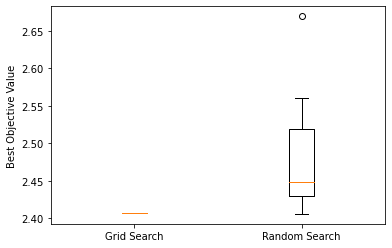

In [16]:
plt.boxplot([res_grid, res_random])
plt.xticks([1,2], ['Grid Search', 'Random Search'])
plt.ylabel("Best Objective Value")